In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from geobr import read_state
import imageio
%matplotlib inline

<AxesSubplot:>

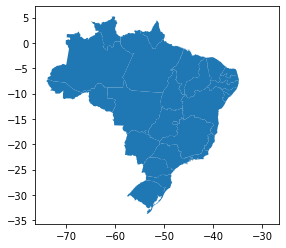

In [2]:
# Gerando shape do brasil dividido em estados com a biblioteca GEOBR
shape_br = read_state(code_state='all')
shape_br.plot()

In [3]:
# Le '2020_BR_Region_Mobility_Report.csv'
data = pd.read_csv('2020_BR_Region_Mobility_Report.csv')
# apaga os dados federais
data = data[data['iso_3166_2_code'].notna()] 
# Formata a coluna para o Merge
data['iso_3166_2_code'] = data['iso_3166_2_code'].str.replace(r'BR-', '')
data_state = data

In [4]:
# Cria a coluna com o poligono representante de cada estado e adiciona ela ao data_state
states = shape_br[['abbrev_state', 'geometry']]
data_state = data_state.merge(states,how='inner', left_on='iso_3166_2_code', right_on='abbrev_state')
# Formata data pra BR
data_state['date'] = pd.to_datetime(data_state['date'], format='%Y-%m-%d').dt.strftime("%d-%m-%Y")
data_state.reset_index(inplace=True)

In [5]:
lista = ["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "parks_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]
semana = ["Segunda-Feira", "Terça-Feira", "Quarta-Feira", "Quinta-Feira", "Sexta-Feira", "Sábado","Domingo"]
titulo = ["Varejo e Lazer", "Mercados e Farmácias", "Parques", "Estações de transporte público", "Locais de Trabalho", "Residencial"]

In [6]:
# Qual coluna irá plotar 0 a 5
number_plot = 1

# Nome do mapa incia em 0
map_indice = 0

# Qual dia da semana começa
diadasemana_atual = 5

coluna = lista[number_plot]
print(coluna)

retail_and_recreation_percent_change_from_baseline


<ipython-input-7-477bbb89dac5>:28: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=j[1], xy=j['coords'], horizontalalignment='center', verticalalignment='center', fontsize=20)


Done: 0_15-02-2020_retail_and_recreation_percent_change_from_baseline


KeyboardInterrupt: 

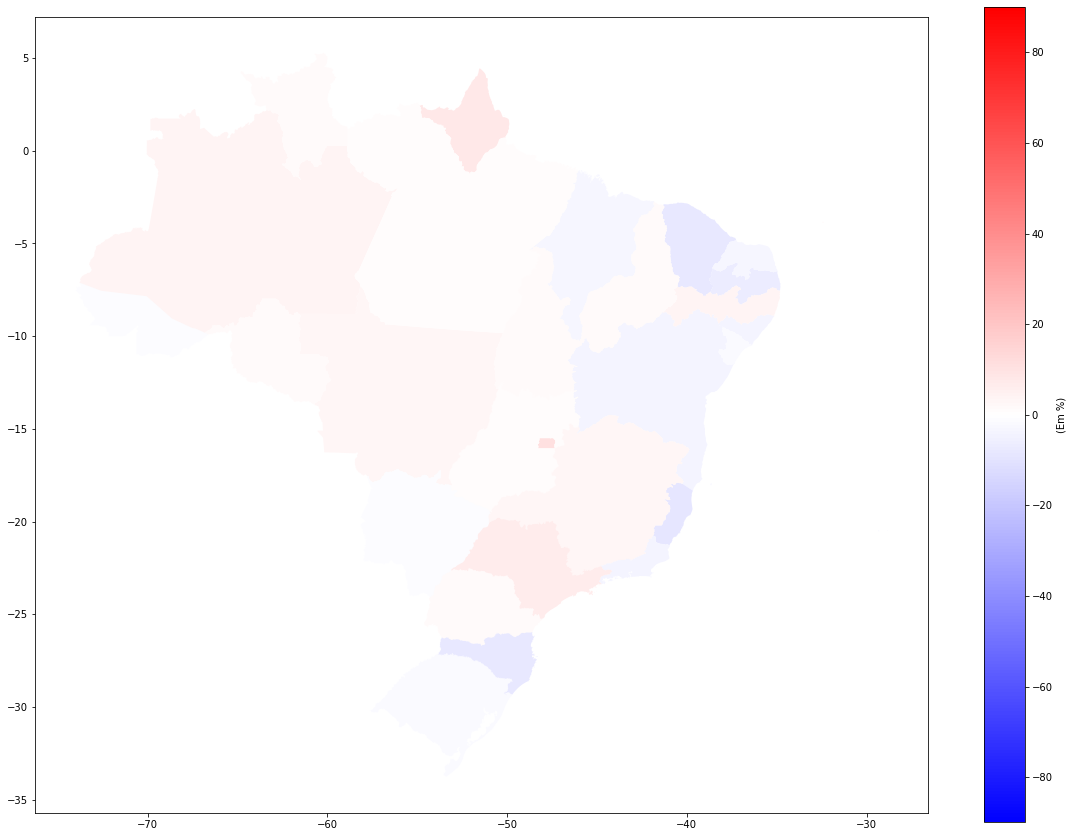

In [7]:
#Faz a plotagem dos mapas por dia
for dia in data_state['date']:
    dia_x = data_state[data_state.date == dia]
    
    #Fazendo o typecasting para GeoDataFrame
    dia_x = gpd.GeoDataFrame(dia_x)
    copy = gpd.GeoDataFrame(data_state)
    copy2 = shape_br
    copy2['coords'] = copy2['geometry'].apply(lambda x: x.representative_point().coords[:])
    copy2['coords'] = [coords[0] for coords in copy2['coords']]
    iterrows = copy2.iterrows()
    del copy2

    fig, ax = plt.subplots(figsize=(20, 15))

    dia_x.plot(column=coluna, cmap='bwr', vmin=-90, legend=True,legend_kwds={'label': f"(Em %)", 'orientation': "vertical"},vmax=90, ax=ax)
    del dia_x

    copy.geometry.boundary.plot(color=None,edgecolor='#888888',linewidth = 0.1,ax=ax)
    del copy

    ax.annotate(f'{semana[diadasemana_atual]}', xy=(0.1,.275),xycoords='figure fraction',horizontalalignment='left', verticalalignment='top',fontsize=35)
    ax.annotate(f'{dia}', xy=(0.1,.225),xycoords='figure fraction',horizontalalignment='left', verticalalignment='top',fontsize=35)
    ax.set_title(f"{titulo[number_plot]} (em %)", fontdict={'fontsize':25})
    ax.axis('off')
    
    for i, j in iterrows:
        plt.annotate(text=j[1], xy=j['coords'], horizontalalignment='center', verticalalignment='center', fontsize=20)
    
    del iterrows
    
    #plt.show()
    # Salva cada mapa como um chart
    chart = ax.get_figure()

    chart.savefig(f'{map_indice}_{dia}_{coluna}.png', dpi=90)
    del chart

    print(f'Done: {map_indice}_{dia}_{coluna}')
    
    map_indice = map_indice+1
    diadasemana_atual = diadasemana_atual+1
    if diadasemana_atual == 7:
        diadasemana_atual = 0

    ax.clear()
    fig.clear(False)
    plt.close('all')